In [1]:
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2
from simulation import Simulation

from pulser.waveforms import BlackmanWaveform,ConstantWaveform

simulation module...


In [2]:
import qutip
import numpy as np
import matplotlib.pyplot as plt

# CZ Gate Implementation

In [21]:
def CZ(initial,distances):
    """
    Implements pulses to excite atoms and control the final state
    """
    
    duration = 500
    pi = Pulse(BlackmanWaveform(duration,np.pi/(4*duration)),ConstantWaveform(duration,0),0)
    twopi = Pulse(BlackmanWaveform(duration,2*np.pi/(4*duration)),ConstantWaveform(duration,0),0)
    
    sequence = [[pi,'rydberg'], [twopi,'rydberg2'], [pi,'rydberg']]
    
    evolution =[]
    
    for R in distances:
        # Atom Register and Device
        L = 2
        reg = Register.rectangle(1, L, spacing=R, prefix='atom')
        device = Chadoq2(reg) 
        #reg.draw()
        
        state = initial #begin with initial state
        for pulse,channel in sequence:
            
            # Define sequence and Set channels
            seq = Sequence(device)
            seq.declare_channel('rydberg', 'rydberg_local', initial_target='atom0') #Atom 0 will be control
            seq.declare_channel('rydberg2', 'rydberg_local2', initial_target='atom1') #Atom 1 will be target
            seq.declare_channel('raman', 'raman_local', initial_target='atom1') # Idle so that 3-state basis is used

            seq.add(pulse,channel)#, protocol="wait-for-all") 
            
            seq.delay(seq.current_duration(),'raman')
            #seq.draw()
            
            simul = Simulation(seq)
            simul.run(initial_state = state, plot=False) #output will be final state
            state = simul.output #update state after pulse
        
        #seq.draw()
        #print(seq._schedule['rydberg'])
        
        res = np.vdot(initial.data.toarray(),state.data.toarray())
            
        #print(f'R = {R}. VdW = {1e6 / (R**6)}.  Expectation Value = {expectation_val}')
        evolution.append(res)

    return evolution

Changing Initial State
(-0.9999998576019401-0.0005336426275937676j)
Changing Initial State
(-0.9999999999954451+0j)
Changing Initial State
(-0.9999999998904782+0j)
Changing Initial State
(1+0j)


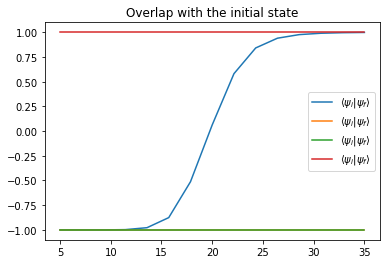

In [22]:
gg = qutip.tensor([qutip.basis(3,1),qutip.basis(3,1)])
gh = qutip.tensor([qutip.basis(3,1),qutip.basis(3,2)])
hg = qutip.tensor([qutip.basis(3,2),qutip.basis(3,1)])
hh = qutip.tensor([qutip.basis(3,2),qutip.basis(3,2)])

states = [gg,gh,hg,hh] 

distances = np.linspace(5,35,15)
for initial in states:
    print('Changing Initial State')
    evolution = CZ(initial,distances)
    print(evolution[0])
    
    plt.plot(distances, np.real(evolution), label=fr"$\langle \psi_i|\psi_f\rangle$")
    #plt.plot(distances,evolution_i, label=fr"Im$|\psi_0\rangle = |${names}$\rangle$")
    plt.title('Overlap with the initial state')
    plt.legend()

    